# Practical GPs (Work in progress)

In this chapter we will see some notes on practical implementation of GPs.

## Notation

|Notation|Meaning|Comment|
|:-:|:-:|:--|
|$A$|matrix|capital letters|
|$\mathbf{a}$|column vector|small letters (bold)|
|$a$|scaler|small letters (normal)|

## Defining GPs (a bayesian way)

With abstract notation, We can define GPs in function space as the following,

$$
p(\mathbf{f}|\mathbf{y}) = \frac{p(\mathbf{y}|\mathbf{f})p(\mathbf{f})}{p(\mathbf{y})}
$$

looking at the individual components,

## Prior: $p(\mathbf{f})$

$p(\mathbf{f})$ is **prior** (initial belief) over potential functions that can model our data ($\mathbf{y}$) well. For example, if we suspect that our data has a shape of degree 3 polynomial ($y = f(x) = w_1x^3 + w_2x^2 + w_3x + w_4$), we may define $p(\mathbf{f})$ over all possible degree 3 polynomials. In GPs, we define such functions with Multivariate Normal (MVN) distribution. The covariance matrix for this MVN distribution is generated using a covariance function or kernel which depends on $X$. Note that maximum degree of polynomial $f(X)$ that can be generated from such Multivariate-Normal (MVN) distributions is same as the rank of covariance matrix. For example, if our covariance matrix is rank 5, all samples generated from such MVN distribution are at maximum degree 5 functions of $X$.   

From the above discussion, one may have noticed that kernels play an important role in defining the priors in GPs (and thus, effectively everything in GPs).

### Kernels: $K(\mathbf{x}_i, \mathbf{x}_j)$

A kernel function takes two vectors $\mathbf{x}_i, \mathbf{x}_j$ (along with some parameters) and returns a single scaler (similarity score). Here, $\mathbf{x}_i, \mathbf{x}_j$ are vectors because we take a generelized case where $X$ consists of multiple features and thus length of these vectors would be same as number of features.

Now, interestingly, composition of kernel function decides the rank of covariance matrix and thus max degree of polynomial that can be generated using this kernel.

For example, let us see examples of several kernels.

In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

Generating features (X) in 5D.

In [2]:
X = np.random.uniform(0,5,20).reshape(10,2)

### Linear kernel

Linear kernel (aka dot product kernel) creates a covariance matrix of rank 1. It can be defined as the following,

$$
K(\mathbf{x_i}, \mathbf{x_j}) = \sigma^2\mathbf{x_i}^T\mathbf{x_j}
$$

$\sigma^2$ denotes kernel variance parameter.

In [3]:
def LinearKernel(X_i, X_j, sigma): # Vectorized implementation
    return (sigma**2)*(X_i@X_j.T) # not X_i.T@X_j because this is a vectorized implementation for X_i and X_j matrices

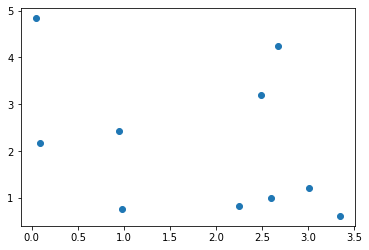

In [4]:
sigma = 1

# cov_matrix = LinearKernel(X, X, sigma)
cov_matrix = GPy.kern.Linear(X.shape[1], ARD=False).K(X)

y = np.random.multivariate_normal(np.zeros(10), cov_matrix)
plt.scatter(X[:,0], X[:,1]);